In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
B1_IO = pd.read_csv('Data/Batch_1/Interval_order.csv')
B1_Depth = pd.read_csv('Data/Batch_1/Depth.csv')

B2_IO = pd.read_csv('Data/Batch_2/Interval_order.csv')
B2_Depth = pd.read_csv('Data/Batch_2/Depth.csv')

In [3]:
plt.plot(B1_IO['Chrom'])
print(B1_IO.shape, B1_Depth.shape)
plt.close() 

((79451, 3), (79451, 24))


In [4]:
plt.plot(B2_IO['Chrom'])
print(B2_IO.shape, B2_Depth.shape) 
plt.close() 

((79451, 3), (79451, 24))


In [5]:
plt.plot(B2_Depth) 
plt.close() 

In [6]:
B1_IO.head() 

,Chrom,Start,End
0,1,948903,949006
1,1,949313,949413
2,1,949414,949513
3,1,949514,949613
4,1,949614,949713


In [7]:
B1_IO.loc[B1_IO['Chrom'] == 24].head() 

,Chrom,Start,End
73537,24,2649475,2649574
73538,24,2649575,2649674
73539,24,2654743,2654843
73540,24,2654844,2654943
73541,24,2654944,2655043


In [8]:
bounds=[] 
for i in range(1,25): 
    bounds.append((B1_IO.loc[B1_IO['Chrom'] == i].iloc[0].name,B1_IO.loc[B1_IO['Chrom'] == i].iloc[-1].name)) 

In [9]:
bounds[0][1]

5292

In [10]:
counts = np.zeros((24,24)) # Chromosome number (1-23) (on the rows) x sample number (1-24) (on the columns)
for i in range(24):
    counts[i,:] = np.sum(B1_Depth[bounds[i][0]:bounds[i][1]+1]) #watch the notation here bc I think calls one too short for DataFrames 
#B1_Depth.iloc[bounds[0][0]]

In [11]:
#For weighted counts instead, to not bias for larger reads 
wtcounts=np.zeros((24,24))
for i in range(24):
    wtcounts[i,:] = np.sum(B1_Depth[bounds[i][0]:bounds[i][1]+1])/np.sum(B1_IO[bounds[i][0]:bounds[i][1]+1]['End']-B1_IO[bounds[i][0]:bounds[i][1]+1]['Start'])
    # Check this but the second part should be normalization over size of read 

In [12]:
B1_IO[bounds[i][0]:bounds[i][1]+1]['End']-B1_IO[bounds[i][0]:bounds[i][1]+1]['Start']

73537     99
73538     99
73539    100
73540     99
73541     99
73542     99
73543     99
73544     99
73545     99
73546     99
73547     99
73548     99
73549     99
73550     99
73551     99
73552     99
73553     99
73554     99
73555     99
73556     99
73557     99
73558     99
73559     99
73560     99
73561     99
73562     99
73563     99
73564     99
73565     99
73566     99
        ... 
79421     84
79422    100
79423     99
79424     99
79425     99
79426     99
79427    159
79428    100
79429     99
79430     99
79431     99
79432     99
79433    119
79434    100
79435    149
79436    100
79437    125
79438    139
79439    100
79440     99
79441     99
79442     99
79443     83
79444    100
79445    138
79446    100
79447     99
79448     99
79449     99
79450     99
Length: 5914, dtype: int64

In [13]:
wtcounts[:,0]

array([3.72035549, 3.70916502, 3.6777645 , 3.84635752, 3.76221691,
       3.90850925, 3.73357902, 3.45395795, 3.69985543, 3.75705845,
       3.71740379, 3.70709961, 3.66995237, 3.94600009, 3.72756514,
       3.39316535, 3.77079062, 3.75993786, 3.09182697, 3.41843269,
       3.56924357, 3.26818282, 1.82214917, 1.48448123])

In [14]:
counts[:,0]

array([1998723.7814    , 1793318.2324    , 1464504.2118    ,
        995364.2441    , 1573355.3504    , 1635308.545     ,
       1901713.41010001,  814208.4152    , 1229598.8546    ,
        863341.9744    , 1296392.5281    , 1420397.4586    ,
        548166.1053    ,  877353.661     , 1066817.9616    ,
        711136.2002    , 1345010.8483    ,  376478.8181    ,
       1010328.6676    ,  569938.1903    ,  132479.6137    ,
        368046.4084    , 1690648.31290004,  892136.10469999])

/Users/Kiran/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


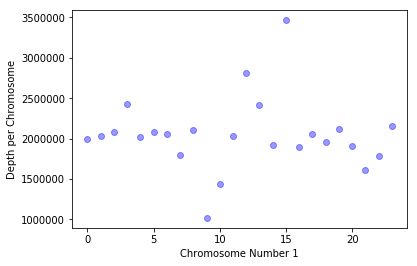

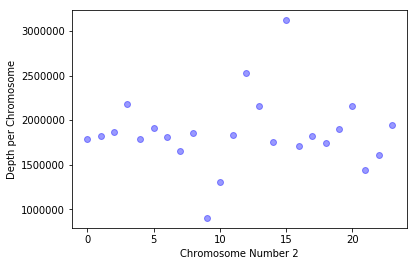

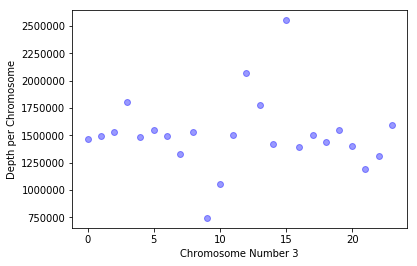

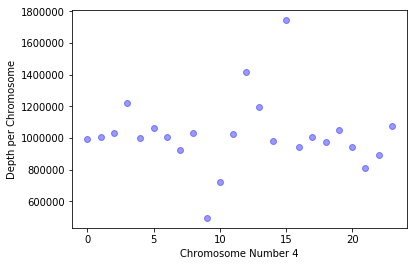

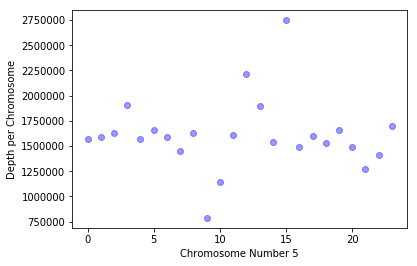

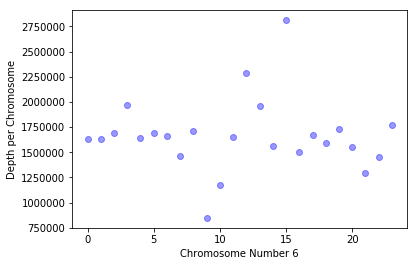

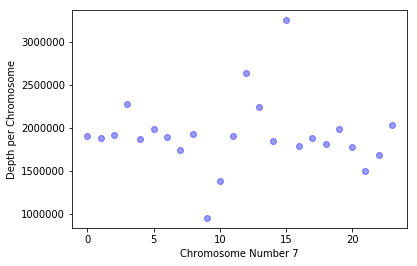

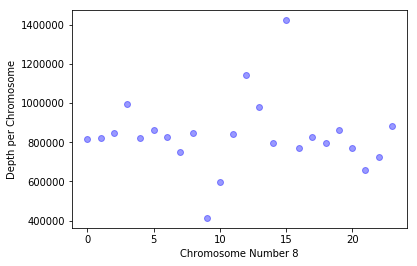

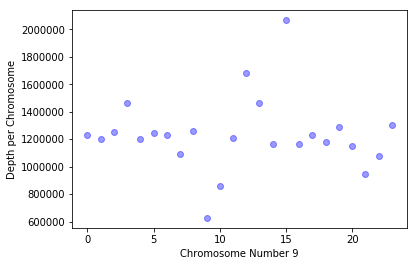

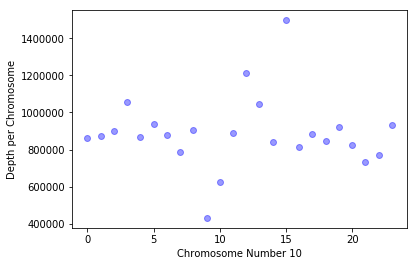

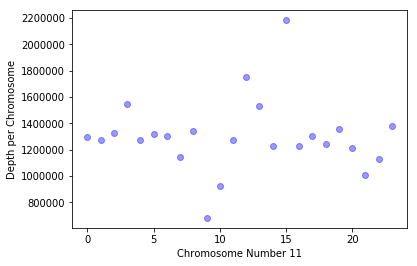

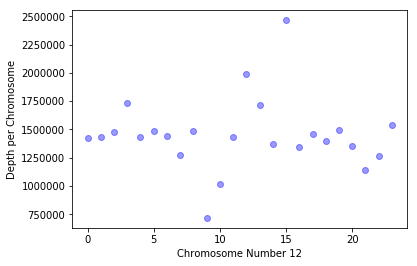

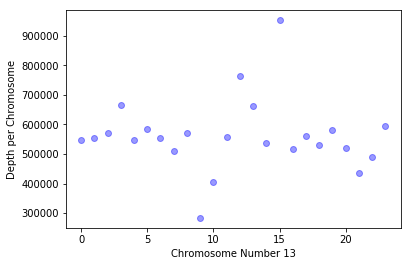

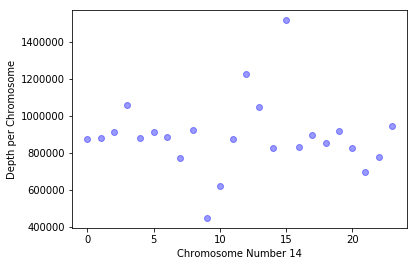

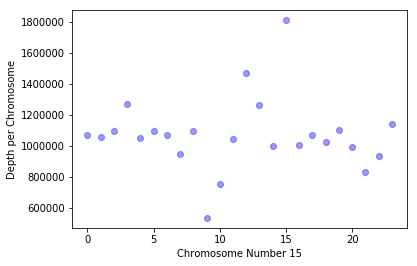

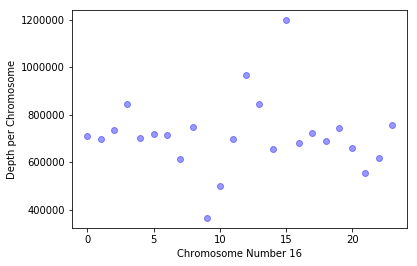

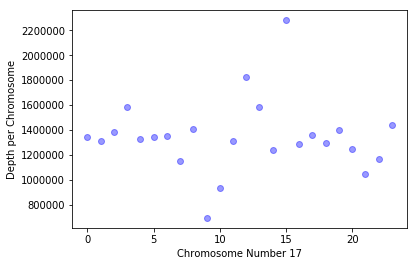

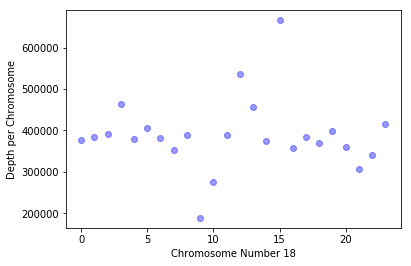

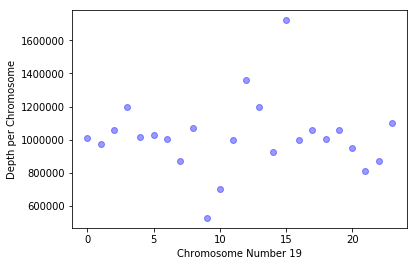

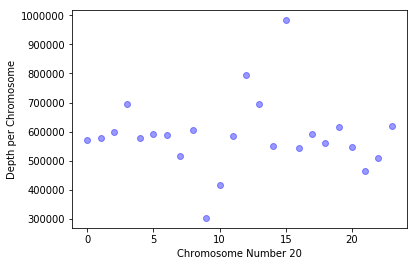

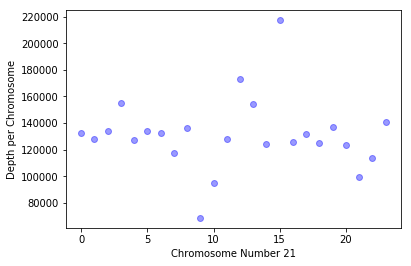

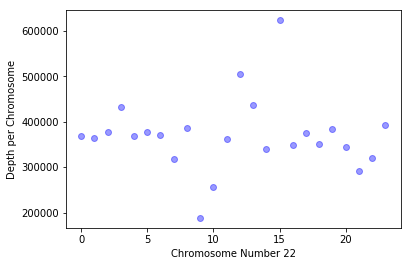

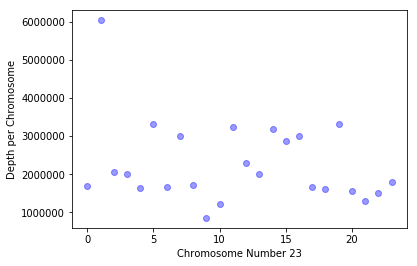

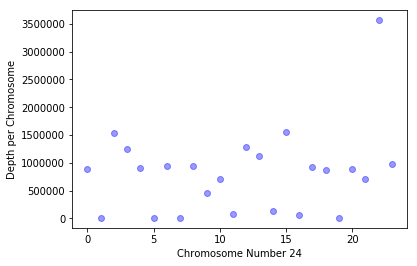

In [15]:
# Let's make a plot of the counts for each chromosome for each sample 
for i in range(24): 
    plt.figure() 
    plt.plot(counts[i,:], 'bo', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosome Number ' + str(i+1))

In [16]:
np.argmax(counts[0,:])

15

In [17]:
counts[0,:][15]

3465935.246699991

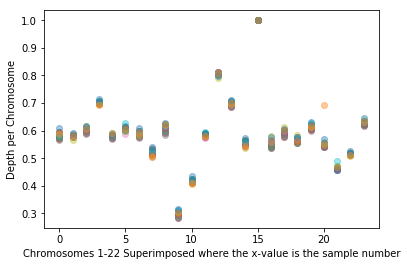

In [18]:
# Normalized signature plot?  
for i in range(22):  
    plt.plot(counts[i,:]/counts[i,:][np.argmax(counts[i,:])], 'o', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosomes 1-22 Superimposed where the x-value is the sample number')

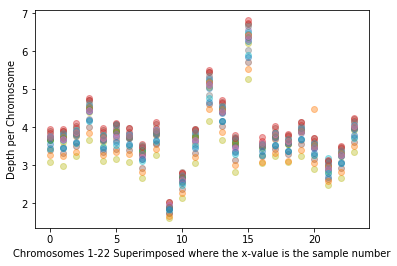

In [19]:
# Normalized signature plot?  
for i in range(22):  
    plt.plot(wtcounts[i,:], 'o', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosomes 1-22 Superimposed where the x-value is the sample number')

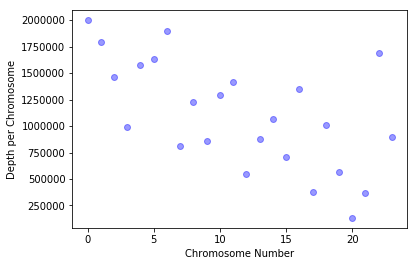

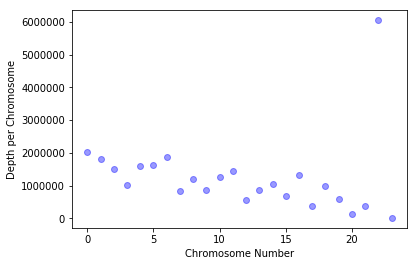

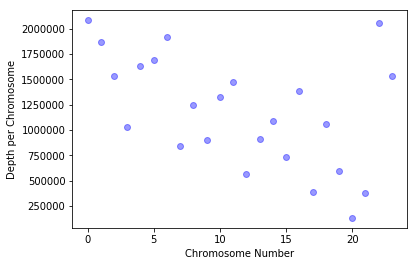

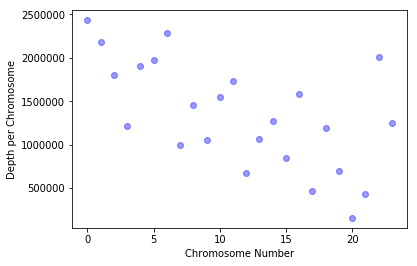

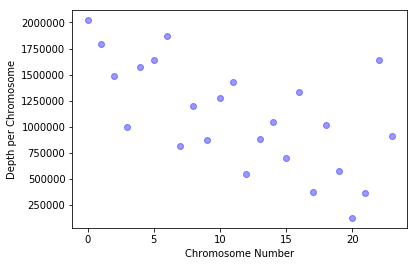

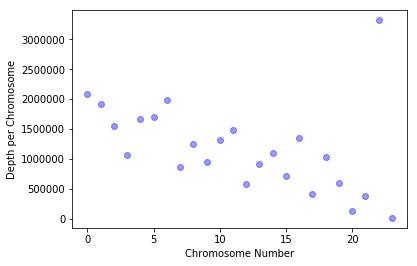

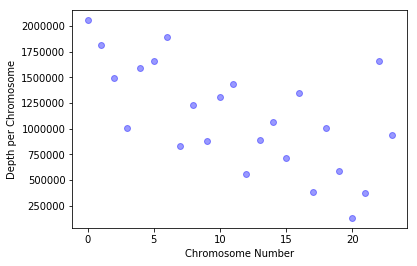

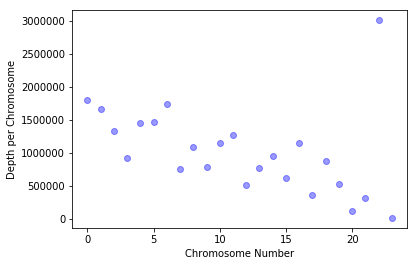

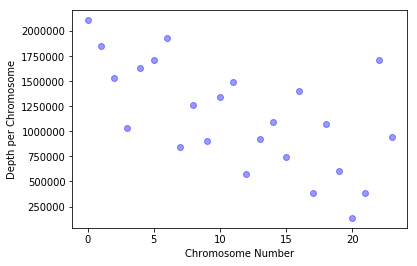

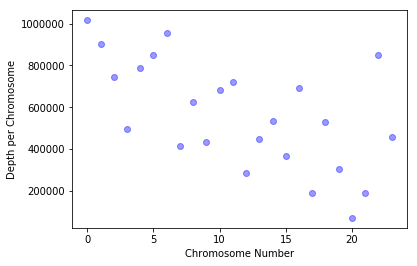

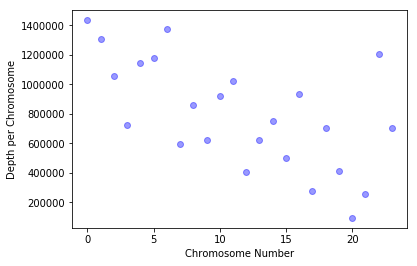

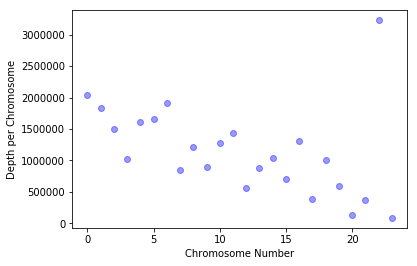

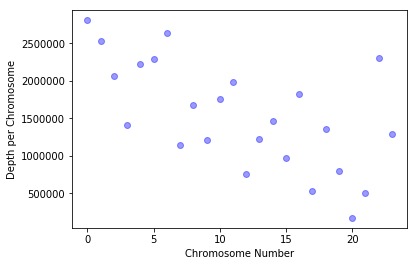

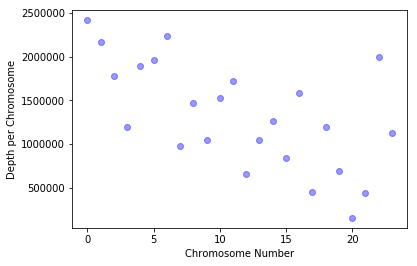

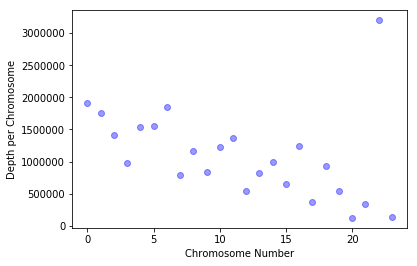

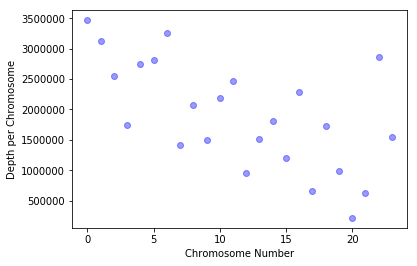

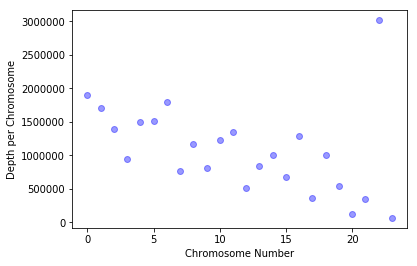

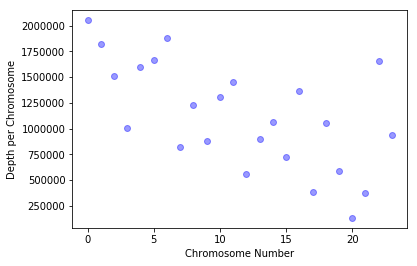

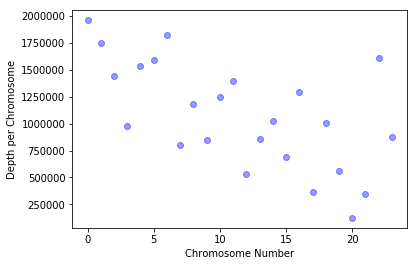

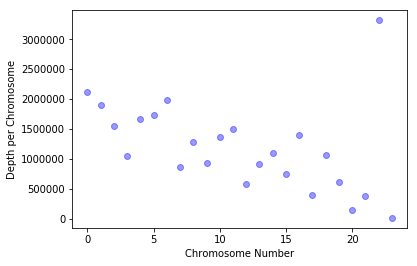

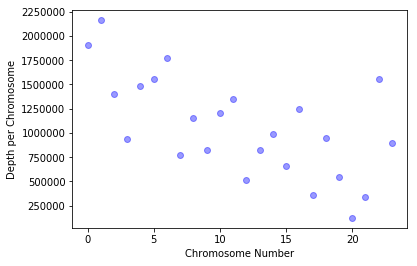

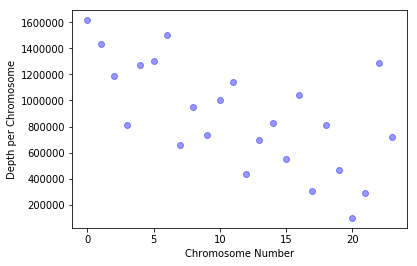

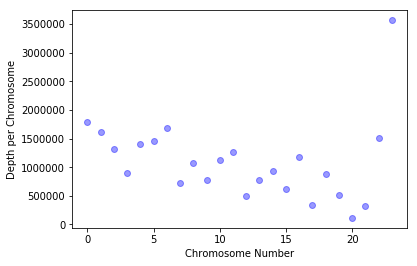

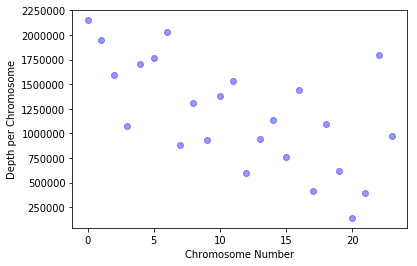

In [20]:
# And now let's see the counts for each chromosome per sample 
for i in range(24): 
    plt.figure() 
    plt.plot(counts[:,i], 'bo', alpha=0.4) 
    plt.ylabel('Depth per Chromosome') 
    plt.xlabel('Chromosome Number') 

In [21]:
print(B1_IO.shape, B1_Depth.shape)

((79451, 3), (79451, 24))


### Redoing the bounds to see what the coverage looks like 

In [22]:
#Here, examine the difference between the start of the next read location and the end of the last to see where we can locally average reads 
skips =[] 
i=1 
for k in range(len(B1_IO.loc[B1_IO['Chrom'] == i])-1): 
    skips.append(B1_IO.loc[B1_IO['Chrom'] == i]['Start'][k+1]-B1_IO.loc[B1_IO['Chrom'] == i]['End'][k]) 

In [23]:
chrom1 = pd.DataFrame(data=skips) 
chrom1.columns = ['SkippedBP'] 
bool1 = chrom1['SkippedBP'] > 500 
bool1 = pd.DataFrame(data=bool1) 
bool1.columns = ['BoolBP']
bool1.SkippedBP = bool1.BoolBP.shift(1)
chrom1.SkippedBP = chrom1.SkippedBP.shift(1) 

/Users/Kiran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [24]:
chrom1bool = pd.concat([B1_IO.loc[B1_IO['Chrom'] == 1], bool1, chrom1], axis=1, sort=False) 
chrom1skips = chrom1bool.loc[chrom1bool['SkippedBP'] > 500] 
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP
7,1,995394,995494,False,45486.0
9,1,1846266,1846366,False,850671.0
15,1,1847829,1847929,False,605.0
23,1,2160232,2160331,False,311550.0
33,1,2234341,2234441,False,73109.0


### Here, this defines the bounds for which we can locally aggregate the data per chromosome. 

In [25]:
chrom1bounds=[] 
for i in range(len(chrom1skips)-1): 
    chrom1bounds.append((chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i].name,chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i+1].name)) 

In [26]:
set(np.array(chrom1bounds).flatten())

{4779,
 2052,
 4102,
 7,
 9,
 2059,
 4108,
 2062,
 15,
 2064,
 2066,
 4117,
 23,
 4100,
 4122,
 4783,
 4124,
 2077,
 4126,
 5125,
 33,
 2084,
 2088,
 2091,
 2093,
 47,
 2097,
 2100,
 2102,
 2057,
 2740,
 4156,
 2109,
 2114,
 2742,
 4168,
 2122,
 2124,
 2126,
 4176,
 5090,
 2132,
 5134,
 87,
 2136,
 2139,
 2141,
 4324,
 2143,
 4112,
 4196,
 5137,
 104,
 109,
 111,
 113,
 115,
 4212,
 117,
 119,
 122,
 124,
 4221,
 127,
 130,
 132,
 2181,
 2183,
 2185,
 138,
 2071,
 2188,
 4237,
 142,
 4488,
 2192,
 146,
 2198,
 4249,
 4252,
 2206,
 2209,
 3756,
 2212,
 2215,
 4264,
 4266,
 4268,
 2222,
 2224,
 4274,
 2227,
 181,
 2230,
 2232,
 186,
 188,
 189,
 2239,
 195,
 5121,
 197,
 2246,
 4030,
 200,
 4298,
 203,
 2253,
 4303,
 2256,
 4308,
 4310,
 4314,
 4317,
 223,
 2272,
 225,
 4322,
 227,
 228,
 230,
 2281,
 2284,
 238,
 2287,
 241,
 245,
 2300,
 4350,
 2303,
 4353,
 2306,
 2309,
 4358,
 2312,
 4407,
 2315,
 2318,
 4748,
 2320,
 2322,
 4372,
 2325,
 4374,
 2329,
 4378,
 2095,
 2332,
 2335,
 516

In [27]:
len(chrom1skips)

1035

### Test this out to see where the skips actually are, so the skips are all values that are present in the list 

In [28]:
chrom1bounds=[] 
for i in range(len(chrom1skips)-1): 
    chrom1bounds.append(chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i].name)

In [29]:
chrom1bounds

[7,
 9,
 15,
 23,
 33,
 47,
 87,
 104,
 109,
 111,
 113,
 115,
 117,
 119,
 122,
 124,
 127,
 130,
 132,
 138,
 142,
 146,
 181,
 186,
 188,
 189,
 195,
 197,
 200,
 203,
 223,
 225,
 227,
 228,
 230,
 238,
 241,
 245,
 323,
 324,
 326,
 328,
 341,
 344,
 368,
 374,
 396,
 398,
 428,
 430,
 433,
 435,
 444,
 448,
 453,
 454,
 509,
 512,
 525,
 528,
 531,
 535,
 539,
 543,
 547,
 554,
 555,
 557,
 559,
 566,
 569,
 572,
 597,
 599,
 616,
 618,
 621,
 623,
 625,
 628,
 629,
 633,
 639,
 642,
 644,
 646,
 648,
 650,
 652,
 658,
 661,
 664,
 667,
 669,
 671,
 677,
 688,
 690,
 692,
 694,
 696,
 701,
 710,
 726,
 759,
 764,
 768,
 769,
 775,
 777,
 782,
 786,
 788,
 791,
 794,
 797,
 804,
 806,
 814,
 817,
 824,
 826,
 827,
 828,
 830,
 834,
 838,
 840,
 847,
 851,
 853,
 859,
 866,
 868,
 878,
 890,
 895,
 916,
 924,
 928,
 932,
 936,
 944,
 987,
 989,
 991,
 994,
 996,
 998,
 999,
 1001,
 1003,
 1005,
 1007,
 1010,
 1012,
 1014,
 1016,
 1018,
 1020,
 1021,
 1023,
 1025,
 1031,
 1039,
 104

In [30]:
chrom1skips 

,Chrom,Start,End,BoolBP,SkippedBP
7,1,995394,995494,False,45486.0
9,1,1846266,1846366,False,850671.0
15,1,1847829,1847929,False,605.0
23,1,2160232,2160331,False,311550.0
33,1,2234341,2234441,False,73109.0
47,1,2237386,2237486,False,1335.0
87,1,2336241,2336341,False,94589.0
104,1,2339811,2339911,False,1345.0
109,1,2341736,2341836,False,1373.0
111,1,2343857,2343956,False,1879.0


### Here, let's try to recreate the graph that Dimitri showed us with the counts of the 24 Chromosomes from a single sample. 

In [31]:
bounds=[] 
for i in range(1,25): 
    bounds.append((B1_IO.loc[B1_IO['Chrom'] == i].iloc[0].name,B1_IO.loc[B1_IO['Chrom'] == i].iloc[-1].name)) 
bounds 

[(0, 5292),
 (5293, 10049),
 (10050, 13952),
 (13953, 16489),
 (16490, 20626),
 (20627, 24759),
 (24760, 29820),
 (29821, 32133),
 (32134, 35423),
 (35424, 37693),
 (37694, 41144),
 (41145, 44906),
 (44907, 46375),
 (46376, 48549),
 (48550, 51374),
 (51375, 53431),
 (53432, 56938),
 (56939, 57918),
 (57919, 61147),
 (61148, 62778),
 (62779, 63147),
 (63148, 64249),
 (64250, 73536),
 (73537, 79450)]

In [32]:
counts = np.zeros((24,24)) # Chromosome number (1-23) (on the rows) x sample number (1-24) (on the columns)
for i in range(24):
    counts[i,:] = np.sum(B1_Depth[bounds[i][0]:bounds[i][1]+1]) #watch the notation here bc I think calls one too short for DataFrames 
#B1_Depth.iloc[bounds[0][0]] 
counts 

array([[1998723.7814    , 2026343.8766    , 2083296.8701    ,
        2432524.23530001, 2020783.9452    , 2086725.9714    ,
        2057331.3011    , 1791558.6552    , 2108879.4954    ,
        1016953.294     , 1434943.7736    , 2032410.3522    ,
        2807010.9894    , 2415084.59400001, 1916817.9008    ,
        3465935.24669999, 1900208.8745    , 2053113.6433    ,
        1958710.8506    , 2122872.5111    , 1908395.8809    ,
        1615213.2058    , 1785201.967     , 2150059.21340001],
       [1793318.2324    , 1819239.64430001, 1870663.4967    ,
        2185365.32829999, 1790526.6534    , 1912379.12730001,
        1815842.5862    , 1657602.05910001, 1856699.0379    ,
         903571.7121    , 1305801.4829    , 1832374.1344    ,
        2525585.3633    , 2161750.7752    , 1758995.2637    ,
        3119571.1861    , 1709527.4806    , 1824694.5426    ,
        1744851.9327    , 1897125.10400001, 2162704.0578    ,
        1436244.2936    , 1608710.8169    , 1944919.24029999],
      

In [33]:
len(counts)

24

In [34]:
counts = pd.DataFrame(data=counts).T 
counts.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'] 
counts['1']

0     1.998724e+06
1     2.026344e+06
2     2.083297e+06
3     2.432524e+06
4     2.020784e+06
5     2.086726e+06
6     2.057331e+06
7     1.791559e+06
8     2.108879e+06
9     1.016953e+06
10    1.434944e+06
11    2.032410e+06
12    2.807011e+06
13    2.415085e+06
14    1.916818e+06
15    3.465935e+06
16    1.900209e+06
17    2.053114e+06
18    1.958711e+06
19    2.122873e+06
20    1.908396e+06
21    1.615213e+06
22    1.785202e+06
23    2.150059e+06
Name: 1, dtype: float64

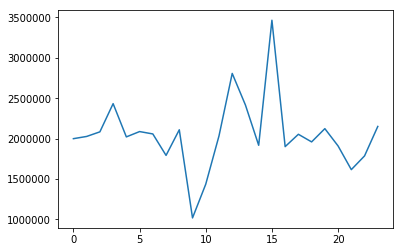

In [35]:
plt.plot(counts['1'])

(array([ 1.,  1.,  1.,  6., 11.,  2.,  0.,  1.,  0.,  1.]),
 array([1016953.294     , 1261851.48927   , 1506749.68454   ,
        1751647.87981   , 1996546.07508   , 2241444.27035   ,
        2486342.46561999, 2731240.66088999, 2976138.85615999,
        3221037.05142999, 3465935.24669999]),
 <a list of 10 Patch objects>)

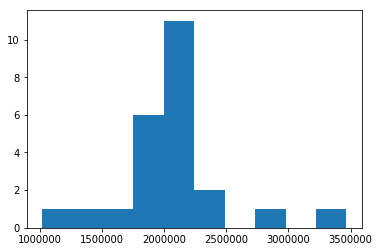

In [36]:
plt.hist(counts['1'])

### So this is good in that it shows the overall counts for the entire chromosome but let's average by every 10000 bp and do a histogram instead! 

### I'm not sure how to just locally aggregate by 10000 bp so let's average per the bounds 

In [37]:
#Here, examine the difference between the start of the next read location and the end of the last to see where we can locally average reads 
skips =[] 
i=1 
for k in range(len(B1_IO.loc[B1_IO['Chrom'] == i])-1): 
    skips.append(B1_IO.loc[B1_IO['Chrom'] == i]['Start'][k+1]-B1_IO.loc[B1_IO['Chrom'] == i]['End'][k]) 

### The skips code takes the difference between the start of the next row and the end of the previous row so you can see where the large jumps are. Typically we see that there are continuous reads but there are also super large jumps. Let's try plotting this on the first chromosome so we can get an idea of where this is represented. 

In [38]:
skips[:10] 

[307, 1, 1, 1, 1, 1, 45486, 1, 850671, 1]

In [39]:
#This is the max bp location of the read on Chromosome 1 
maxread1 = B1_IO.loc[B1_IO['Chrom'] == i]['End'][5292] 
maxread1 

247513149

In [40]:
B1_IO.loc[B1_IO['Chrom'] == i]['Start'].head() 

0    948903
1    949313
2    949414
3    949514
4    949614
Name: Start, dtype: int64

In [41]:
fakechrom1 = np.linspace(0,248956422,5293) # the second value is the length of the first chromosome 
fakechrom1 = pd.DataFrame(data=fakechrom1)

# The way to do this is not to create new bounds its to instead use a plt.xlim command! 

In [42]:
chrom1 = pd.DataFrame(data=skips) 
chrom1.columns = ['SkippedBP'] 
bool1 = chrom1['SkippedBP'] > 500 
bool1 = pd.DataFrame(data=bool1) 
bool1.columns = ['BoolBP']
bool1.SkippedBP = bool1.BoolBP.shift(1)
chrom1.SkippedBP = chrom1.SkippedBP.shift(1) 

/Users/Kiran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [43]:
chrom1bool = pd.concat([B1_IO.loc[B1_IO['Chrom'] == 1], bool1, chrom1], axis=1, sort=False) 
chrom1skips = chrom1bool.loc[chrom1bool['SkippedBP'] > 500] 
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP
7,1,995394,995494,False,45486.0
9,1,1846266,1846366,False,850671.0
15,1,1847829,1847929,False,605.0
23,1,2160232,2160331,False,311550.0
33,1,2234341,2234441,False,73109.0


### Here, this defines the bounds for which we can locally aggregate the data per chromosome. 

In [44]:
chrom1dubbound=[] 
for i in range(len(chrom1skips)-1): 
    chrom1dubbound.append((chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i].name,chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i+1].name)) 

In [45]:
chrom1dubbound

[(7, 9),
 (9, 15),
 (15, 23),
 (23, 33),
 (33, 47),
 (47, 87),
 (87, 104),
 (104, 109),
 (109, 111),
 (111, 113),
 (113, 115),
 (115, 117),
 (117, 119),
 (119, 122),
 (122, 124),
 (124, 127),
 (127, 130),
 (130, 132),
 (132, 138),
 (138, 142),
 (142, 146),
 (146, 181),
 (181, 186),
 (186, 188),
 (188, 189),
 (189, 195),
 (195, 197),
 (197, 200),
 (200, 203),
 (203, 223),
 (223, 225),
 (225, 227),
 (227, 228),
 (228, 230),
 (230, 238),
 (238, 241),
 (241, 245),
 (245, 323),
 (323, 324),
 (324, 326),
 (326, 328),
 (328, 341),
 (341, 344),
 (344, 368),
 (368, 374),
 (374, 396),
 (396, 398),
 (398, 428),
 (428, 430),
 (430, 433),
 (433, 435),
 (435, 444),
 (444, 448),
 (448, 453),
 (453, 454),
 (454, 509),
 (509, 512),
 (512, 525),
 (525, 528),
 (528, 531),
 (531, 535),
 (535, 539),
 (539, 543),
 (543, 547),
 (547, 554),
 (554, 555),
 (555, 557),
 (557, 559),
 (559, 566),
 (566, 569),
 (569, 572),
 (572, 597),
 (597, 599),
 (599, 616),
 (616, 618),
 (618, 621),
 (621, 623),
 (623, 625),
 (

In [46]:
len(chrom1dubbound)

1034

In [47]:
set(np.array(chrom1bounds).flatten())

{4779,
 2052,
 4102,
 7,
 9,
 2059,
 4108,
 2062,
 15,
 2064,
 2066,
 4117,
 23,
 4100,
 4122,
 4783,
 4124,
 2077,
 4126,
 5125,
 33,
 2084,
 2088,
 2091,
 2093,
 47,
 2097,
 2100,
 2102,
 2057,
 2740,
 4156,
 2109,
 2114,
 2742,
 4168,
 2122,
 2124,
 2126,
 4176,
 5090,
 2132,
 5134,
 87,
 2136,
 2139,
 2141,
 4324,
 2143,
 4112,
 4196,
 5137,
 104,
 109,
 111,
 113,
 115,
 4212,
 117,
 119,
 122,
 124,
 4221,
 127,
 130,
 132,
 2181,
 2183,
 2185,
 138,
 2071,
 2188,
 4237,
 142,
 4488,
 2192,
 146,
 2198,
 4249,
 4252,
 2206,
 2209,
 3756,
 2212,
 2215,
 4264,
 4266,
 4268,
 2222,
 2224,
 4274,
 2227,
 181,
 2230,
 2232,
 186,
 188,
 189,
 2239,
 195,
 5121,
 197,
 2246,
 4030,
 200,
 4298,
 203,
 2253,
 4303,
 2256,
 4308,
 4310,
 4314,
 4317,
 223,
 2272,
 225,
 4322,
 227,
 228,
 230,
 2281,
 2284,
 238,
 2287,
 241,
 245,
 2300,
 4350,
 2303,
 4353,
 2306,
 2309,
 4358,
 2312,
 4407,
 2315,
 2318,
 4748,
 2320,
 2322,
 4372,
 2325,
 4374,
 2329,
 4378,
 2095,
 2332,
 2335,
 516

In [48]:
len(chrom1skips)

1035

### Test this out to see where the skips actually are, so the skips are all values that are present in the list 

In [49]:
chrom1bounds=[] 
for i in range(len(chrom1skips)-1): 
    chrom1bounds.append(chrom1bool.loc[chrom1bool['SkippedBP'] > 500].iloc[i].name)

In [50]:
chrom1bounds[:10]

[7, 9, 15, 23, 33, 47, 87, 104, 109, 111]

In [51]:
chrom1bool.head() 

,Chrom,Start,End,BoolBP,SkippedBP
0,1,948903,949006,False,NaN
1,1,949313,949413,False,307.0
2,1,949414,949513,False,1.0
3,1,949514,949613,False,1.0
4,1,949614,949713,False,1.0


In [52]:
reads =[] 
i=1 
for k in range(len(B1_IO.loc[B1_IO['Chrom'] == i])-1): 
    reads.append(B1_IO.loc[B1_IO['Chrom'] == i]['End'][k]-B1_IO.loc[B1_IO['Chrom'] == i]['Start'][k]) 

In [53]:
reads[:10]

[103, 100, 99, 99, 99, 99, 94, 100, 100, 100]

In [54]:
chrom1read = pd.DataFrame(data=reads) 
chrom1read.columns = ['ReadLen'] 

In [55]:
chrom1bool = pd.concat([chrom1bool, chrom1read], axis=1, sort=False) 
chrom1bool.head() 

,Chrom,Start,End,BoolBP,SkippedBP,ReadLen
0,1,948903,949006,False,NaN,103.0
1,1,949313,949413,False,307.0,100.0
2,1,949414,949513,False,1.0,99.0
3,1,949514,949613,False,1.0,99.0
4,1,949614,949713,False,1.0,99.0


In [56]:
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP
7,1,995394,995494,False,45486.0
9,1,1846266,1846366,False,850671.0
15,1,1847829,1847929,False,605.0
23,1,2160232,2160331,False,311550.0
33,1,2234341,2234441,False,73109.0


Let's pull the first Sample's first chromosome data. 

In [57]:
chrom1counters = B1_Depth['Sample 01'][bounds[0][0]:bounds[0][1]+1] 
chrom1counters.head() 

0    234.1442
1    160.0693
2    192.9000
3    218.7100
4    279.2100
Name: Sample 01, dtype: float64

In [58]:
chrom1bool = pd.concat([chrom1bool, chrom1counters], axis=1, sort=False) 
chrom1bool.head()

,Chrom,Start,End,BoolBP,SkippedBP,ReadLen,Sample 01
0,1,948903,949006,False,NaN,103.0,234.1442
1,1,949313,949413,False,307.0,100.0,160.0693
2,1,949414,949513,False,1.0,99.0,192.9000
3,1,949514,949613,False,1.0,99.0,218.7100
4,1,949614,949713,False,1.0,99.0,279.2100


In [59]:
chrom1dubbound[:10]

[(7, 9),
 (9, 15),
 (15, 23),
 (23, 33),
 (33, 47),
 (47, 87),
 (87, 104),
 (104, 109),
 (109, 111),
 (111, 113)]

# One of the issues you'll have is the fact that before the first "True" statement, chrom1dubbound isn't going to return anything so use a little bit of list comprehension to artificially add it in! 

In [60]:
chrom1dubbound = [(0,chrom1dubbound[0][0])] + chrom1dubbound 
chrom1dubbound[:10]

[(0, 7),
 (7, 9),
 (9, 15),
 (15, 23),
 (23, 33),
 (33, 47),
 (47, 87),
 (87, 104),
 (104, 109),
 (109, 111)]

# From this, I think we can get the local aggregation data. 

In [61]:
chrom1bool['ReadLen'][chrom1dubbound[0][0]:chrom1dubbound[0][1]] 

0    103.0
1    100.0
2     99.0
3     99.0
4     99.0
5     99.0
6     94.0
Name: ReadLen, dtype: float64

In [62]:
np.sum(chrom1bool['ReadLen'][chrom1dubbound[0][0]:chrom1dubbound[0][1]])

693.0

In [63]:
ReadLenSums=[] 
for k in range(len(chrom1dubbound)): 
    ReadLenSums.append(np.sum(chrom1bool['ReadLen'][chrom1dubbound[k][0]:chrom1dubbound[k][1]])) 
ReadLenSums[:10]

[693.0, 200.0, 677.0, 811.0, 991.0, 1350.0, 3915.0, 1726.0, 548.0, 241.0]

In [64]:
ReadLenSums = pd.DataFrame(data=ReadLenSums, columns = ['ReadLenSums']) 
chrom1boundsdf = pd.DataFrame(data=chrom1bounds, columns = ['chrom1bounds'])
ReadLenSums = pd.concat([ReadLenSums, chrom1boundsdf], axis=1, sort=False)
ReadLenSums = ReadLenSums.set_index('chrom1bounds') 
ReadLenSums.head() 

,ReadLenSums
chrom1bounds,
7.0,693.0
9.0,200.0
15.0,677.0
23.0,811.0
33.0,991.0


In [65]:
chrom1skips = pd.concat([chrom1skips, ReadLenSums], axis=1, sort=False) 
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP,ReadLenSums
7.0,1.0,995394.0,995494.0,False,45486.0,693.0
9.0,1.0,1846266.0,1846366.0,False,850671.0,200.0
15.0,1.0,1847829.0,1847929.0,False,605.0,677.0
23.0,1.0,2160232.0,2160331.0,False,311550.0,811.0
33.0,1.0,2234341.0,2234441.0,False,73109.0,991.0


In [66]:
chrom1bool['Sample 01'][chrom1dubbound[0][0]:chrom1dubbound[0][1]] 

0    234.1442
1    160.0693
2    192.9000
3    218.7100
4    279.2100
5    307.9300
6    338.5263
Name: Sample 01, dtype: float64

In [67]:
np.sum(chrom1bool['Sample 01'][chrom1dubbound[0][0]:chrom1dubbound[0][1]])

1731.4898

In [68]:
Sample01Sums=[] 
for k in range(len(chrom1dubbound)): 
    Sample01Sums.append(np.sum(chrom1bool['Sample 01'][chrom1dubbound[k][0]:chrom1dubbound[k][1]])) 
Sample01Sums[:10]

[1731.4898,
 388.30690000000004,
 1905.7377999999999,
 2470.077,
 1734.7963,
 4047.3734,
 13509.6194,
 6310.0514,
 870.3153,
 599.6102]

In [69]:
Sample01Sums = pd.DataFrame(data=Sample01Sums, columns = ['Sample01Sums']) 
Sample01Sums = pd.concat([Sample01Sums, chrom1boundsdf], axis=1, sort=False)
Sample01Sums = Sample01Sums.set_index('chrom1bounds') 
Sample01Sums.head() 

,Sample01Sums
chrom1bounds,
7.0,1731.4898
9.0,388.3069
15.0,1905.7378
23.0,2470.0770
33.0,1734.7963


In [70]:
chrom1skips = pd.concat([chrom1skips, Sample01Sums], axis=1, sort=False) 
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP,ReadLenSums,Sample01Sums
7.0,1.0,995394.0,995494.0,False,45486.0,693.0,1731.4898
9.0,1.0,1846266.0,1846366.0,False,850671.0,200.0,388.3069
15.0,1.0,1847829.0,1847929.0,False,605.0,677.0,1905.7378
23.0,1.0,2160232.0,2160331.0,False,311550.0,811.0,2470.0770
33.0,1.0,2234341.0,2234441.0,False,73109.0,991.0,1734.7963


In [71]:
#Let's do reads over the length in bp that they cover 
chrom1skips=pd.concat([chrom1skips, chrom1skips['Sample01Sums']/chrom1skips['ReadLenSums']], axis=1, sort=False)  
chrom1skips.columns = ['Chrom','Start','End','BoolBP','SkippedBP','ReadLenSums','Sample01Sums','NormLen'] 
chrom1skips.head() 

,Chrom,Start,End,BoolBP,SkippedBP,ReadLenSums,Sample01Sums,NormLen
7.0,1.0,995394.0,995494.0,False,45486.0,693.0,1731.4898,2.498542
9.0,1.0,1846266.0,1846366.0,False,850671.0,200.0,388.3069,1.941535
15.0,1.0,1847829.0,1847929.0,False,605.0,677.0,1905.7378,2.814975
23.0,1.0,2160232.0,2160331.0,False,311550.0,811.0,2470.0770,3.045718
33.0,1.0,2234341.0,2234441.0,False,73109.0,991.0,1734.7963,1.750551


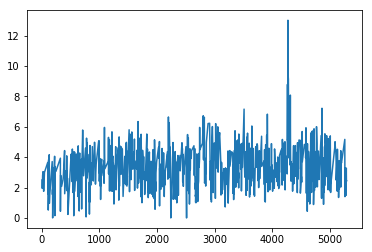

In [72]:
plt.plot(chrom1skips['NormLen'])